In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
raw_data = pd.read_csv('Data/Trainset.csv')
raw_data.dropna(axis=0, how='any', inplace=True)
data = np.array(raw_data)

In [5]:
# Preprocessing Data

m_init = data.shape[0]
months = []
for i in range(m_init):
    mon = data[i][10]
    if mon not in months:
        months.append(mon)
    data[i][10] = months.index(mon)

    if data[i][15] == 'Returning_Visitor':
        data[i][15] = 2
    elif data[i][15] == 'New_Visitor':
        data[i][15] = 1
    elif data[i][15] == 'Other':
        data[i][15] = 0

    if data[i][16] is True:
        data[i][16] = 1
    elif data[i][16] is False:
        data[i][16] = 0

data = np.array(list(data), dtype=np.float)

In [6]:
d = 9500

train = data[:d].T
test = data[d:].T

X_train = train[:-1]
n = X_train.shape[0]
m_train = X_train.shape[1]
Y_train = train[-1].reshape(1, m_train)

X_test = test[:-1]
m_test = X_test.shape[1]
Y_test = test[-1].reshape(1, m_test)


print("X_Train =",X_train.shape)
print("X_Test =",X_test.shape)

X_Train = (17, 9500)
X_Test = (17, 966)


In [7]:
X_norm = np.max(X_train, axis=1, keepdims=True)
X_train = X_train / X_norm
X_test = X_test / X_norm

In [8]:
def sigmoid(z):
    """Compute the sigmoid of z"""
    s = 1 / (1 + np.exp(-z))
    return s

In [9]:
def initialize_with_zeros(dim):
    """This function creates a vector of zeros of shape (dim, 1) for w and initializes b to 0."""
    w = np.zeros((dim, 1))
    b = 0
    assert (w.shape == (dim, 1))
    assert (isinstance(b, float) or isinstance(b, int))
    return w, b

In [10]:
def propagate(w, b, X, Y):
    """Implement the cost function and its gradient for the propagation explained above"""
    m = X.shape[1]

    A = sigmoid(np.dot(w.T, X) + b)  # compute activation
    cost = -(1 / m) * np.sum(Y * np.log(A) + (1 - Y) * np.log(1 - A))  # compute cost

    # BACKWARD PROPAGATION (TO FIND GRAD)
    dw = (1 / m) * np.dot(X, (A - Y).T)
    db = (1 / m) * np.sum(A - Y)

    assert (dw.shape == w.shape)
    assert (db.dtype == float)
    cost = np.squeeze(cost)
    assert (cost.shape == ())

    grads = {"dw": dw,
             "db": db}

    return grads, cost

In [11]:
def optimize(w, b, X, Y, num_iterations, learning_rate, print_cost=False):
    """This function optimizes w and b by running a gradient descent algorithm"""
    costs = []
    for j in range(num_iterations):

        # Cost and gradient calculation
        grads, cost = propagate(w, b, X, Y)

        # Retrieve derivatives from grads
        dw = grads["dw"]
        db = grads["db"]

        # update rule (≈ 2 lines of code)
        w = w - learning_rate * dw
        b = b - learning_rate * db

        # Record the costs
        if j % 100 == 0:
            costs.append(cost)

        # Print the cost every 100 training iterations
        if print_cost and j % 100 == 0:
            print("Cost after iteration %i: %f" % (j, cost))

    params = {"w": w,
              "b": b}

    grads = {"dw": dw,
             "db": db}

    return params, grads, costs


In [12]:
def predict(w, b, X):
    """Predict whether the label is 0 or 1 using learned logistic regression parameters (w, b)"""
    m = X.shape[1]
    y_prediction = np.zeros((1, m))
    w = w.reshape(X.shape[0], 1)

    # Compute vector "A" predicting the probabilities of a cat being present in the picture
    A = sigmoid(np.dot(w.T, X) + b)

    for k in range(A.shape[1]):

        # Convert probabilities A[0,i] to actual predictions p[0,i]
        if A[0, k] >= 0.5:
            y_prediction[0, k] = 1

    assert (y_prediction.shape == (1, m))

    return y_prediction

In [13]:
def model(x_train, y_train, x_test, y_test, num_iterations=2000, learning_rate=0.5, print_cost=False):
    """Builds the logistic regression model by calling the function you've implemented previously"""

    # initialize parameters with zeros
    w, b = initialize_with_zeros(x_train.shape[0])

    # Gradient descent
    parameters, grads, costs = optimize(w, b, x_train, y_train, num_iterations, learning_rate, print_cost)

    # Retrieve parameters w and b from dictionary "parameters"
    w = parameters["w"]
    b = parameters["b"]

    # Predict test/train set examples
    y_prediction_test = predict(w, b, x_test)
    y_prediction_train = predict(w, b, x_train)

    # Print train/test Errors
    print("train accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_train - y_train)) * 100))
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))

    out = {"costs": costs,
           "Y_prediction_test": y_prediction_test,
           "Y_prediction_train": y_prediction_train,
           "w": w,
           "b": b,
           "learning_rate": learning_rate,
           "num_iterations": num_iterations}

    return out

In [14]:
d = model(X_train, Y_train, X_test, Y_test, num_iterations=5000, learning_rate=0.01, print_cost=True)

Cost after iteration 0: 0.693147
Cost after iteration 100: 0.522409
Cost after iteration 200: 0.464361
Cost after iteration 300: 0.441354
Cost after iteration 400: 0.431011
Cost after iteration 500: 0.425855
Cost after iteration 600: 0.423020
Cost after iteration 700: 0.421293
Cost after iteration 800: 0.420120
Cost after iteration 900: 0.419235
Cost after iteration 1000: 0.418505
Cost after iteration 1100: 0.417863
Cost after iteration 1200: 0.417273
Cost after iteration 1300: 0.416716
Cost after iteration 1400: 0.416181
Cost after iteration 1500: 0.415663
Cost after iteration 1600: 0.415158
Cost after iteration 1700: 0.414665
Cost after iteration 1800: 0.414182
Cost after iteration 1900: 0.413709
Cost after iteration 2000: 0.413245
Cost after iteration 2100: 0.412790
Cost after iteration 2200: 0.412343
Cost after iteration 2300: 0.411904
Cost after iteration 2400: 0.411472
Cost after iteration 2500: 0.411049
Cost after iteration 2600: 0.410632
Cost after iteration 2700: 0.410223
Cost

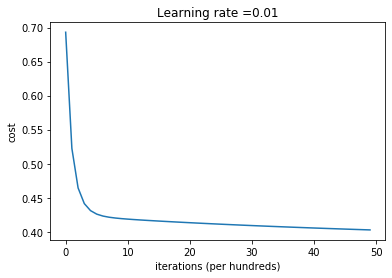

In [15]:
costs = np.squeeze(d['costs'])
plt.plot(costs)
plt.ylabel('cost')
plt.xlabel('iterations (per hundreds)')
plt.title("Learning rate =" + str(d["learning_rate"]))
plt.show()

learning rate is: 0.01
train accuracy: 84.64210526315789 %
test accuracy: 83.12629399585921 %

-------------------------------------------------------

learning rate is: 0.001
train accuracy: 84.64210526315789 %
test accuracy: 83.12629399585921 %

-------------------------------------------------------

learning rate is: 0.0001
train accuracy: 84.64210526315789 %
test accuracy: 83.12629399585921 %

-------------------------------------------------------



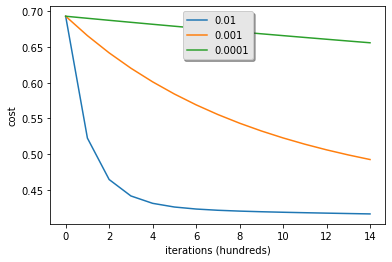

In [16]:
learning_rates = [0.01, 0.001, 0.0001]
models = {}
for i in learning_rates:
    print("learning rate is: " + str(i))
    models[str(i)] = model(X_train, Y_train, X_test, Y_test, num_iterations=1500, learning_rate=i, print_cost=False)
    print('\n' + "-------------------------------------------------------" + '\n')

for i in learning_rates:
    plt.plot(np.squeeze(models[str(i)]["costs"]), label=str(models[str(i)]["learning_rate"]))

plt.ylabel('cost')
plt.xlabel('iterations (hundreds)')

legend = plt.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()
